<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [145]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [146]:
#Command does not work in local Jupyter notebook
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
    
    

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


### Load Data From CSV File


In [147]:
#Download csv file and read onto df
df = pd.read_csv(r'C:\Users\philipp\Documents\Coursera\Coursera IBM Data Science\Machine Learning with Python\Week 6 Assignment\loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [148]:
df.shape

(346, 10)

### Convert to date time object


In [149]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [150]:
#add effective_year and due_year as additional columns
df['effective_year'] = df['effective_date'].dt.year
df['due_year'] = df['due_date'].dt.year
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_year,due_year
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,2016,2016
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,2016,2016
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,2016,2016
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,2016,2016
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,2016,2016


In [151]:
#add effective_month and due_month as additional columns
df['effective_month'] = df['effective_date'].dt.month
df['due_month'] = df['due_date'].dt.month
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_year,due_year,effective_month,due_month
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,2016,2016,9,10
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,2016,2016,9,10
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,2016,2016,9,9
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,2016,2016,9,10
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,2016,2016,9,10


In [152]:
df.groupby(['effective_year'])['loan_status'].value_counts(normalize=True)

effective_year  loan_status
2016            PAIDOFF        0.751445
                COLLECTION     0.248555
Name: loan_status, dtype: float64

In [153]:
df.groupby(['due_year'])['loan_status'].value_counts(normalize=True)

due_year  loan_status
2016      PAIDOFF        0.751445
          COLLECTION     0.248555
Name: loan_status, dtype: float64

In [154]:
df.groupby(['effective_month'])['loan_status'].value_counts(normalize=True)

effective_month  loan_status
9                PAIDOFF        0.751445
                 COLLECTION     0.248555
Name: loan_status, dtype: float64

In [155]:
df.groupby(['due_month'])['loan_status'].value_counts(normalize=True)

due_month  loan_status
9          PAIDOFF        0.803922
           COLLECTION     0.196078
10         PAIDOFF        0.718232
           COLLECTION     0.281768
11         PAIDOFF        0.583333
           COLLECTION     0.416667
Name: loan_status, dtype: float64

In [156]:
df.groupby(['terms'])['loan_status'].value_counts()

terms  loan_status
7      PAIDOFF         14
15     PAIDOFF        114
       COLLECTION      34
30     PAIDOFF        132
       COLLECTION      52
Name: loan_status, dtype: int64

Only 7 instances with day terms. Consider dropping.

# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [157]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [158]:
df['loan_status'].value_counts(normalize=True)

PAIDOFF       0.751445
COLLECTION    0.248555
Name: loan_status, dtype: float64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [159]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



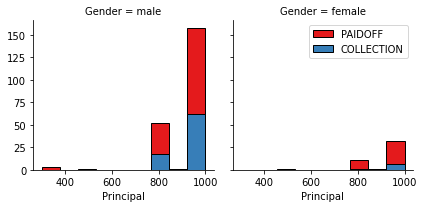

In [160]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

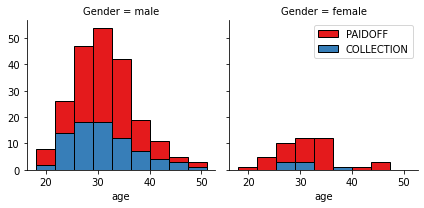

In [161]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


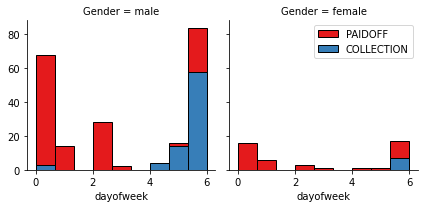

In [162]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [163]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_year,due_year,effective_month,due_month,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,2016,2016,9,10,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,2016,2016,9,10,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,2016,2016,9,9,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,2016,2016,9,10,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,2016,2016,9,10,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [164]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [165]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_year,due_year,effective_month,due_month,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,2016,2016,9,10,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,2016,2016,9,10,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,2016,2016,9,9,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,2016,2016,9,10,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,2016,2016,9,10,4,1


## One Hot Encoding

#### How about education?


In [166]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [167]:
#only two instances have a Master or above
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

#### Features before One Hot Encoding


In [168]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [169]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [170]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [171]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [172]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [173]:
print(np.shape(X))
print(np.shape(y))

(346, 8)
(346,)


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [174]:
#Train/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [175]:
#Classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#k = 4

k_iter = []
k_accuracy = []
for k in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)

    print("\nAccuracy for k = ", k)
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
    k_iter.append(k)
    k_accuracy.append(metrics.accuracy_score(y_test, yhat))



Accuracy for k =  1
Train set Accuracy:  0.894927536231884
Test set Accuracy:  0.6714285714285714

Accuracy for k =  2
Train set Accuracy:  0.822463768115942
Test set Accuracy:  0.6571428571428571

Accuracy for k =  3
Train set Accuracy:  0.8333333333333334
Test set Accuracy:  0.7142857142857143

Accuracy for k =  4
Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.6857142857142857

Accuracy for k =  5
Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.7571428571428571

Accuracy for k =  6
Train set Accuracy:  0.8007246376811594
Test set Accuracy:  0.7142857142857143

Accuracy for k =  7
Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7857142857142857

Accuracy for k =  8
Train set Accuracy:  0.7971014492753623
Test set Accuracy:  0.7571428571428571

Accuracy for k =  9
Train set Accuracy:  0.7898550724637681
Test set Accuracy:  0.7571428571428571

Accuracy for k =  10
Train set Accuracy:  0.7753623188405797
Test set Accuracy:  0.6714285714285714



0.7857142857142857


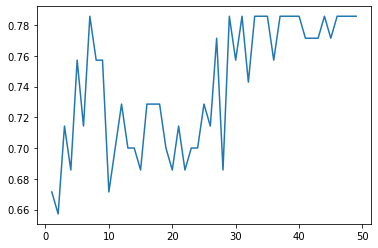

In [176]:
max_accuracy = np.max(k_accuracy)
print(max_accuracy)

import seaborn as sns

sns.lineplot(x = k_iter, y=k_accuracy)

In [177]:
print(yhat)

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [178]:
indices = [i for i, x in enumerate(k_accuracy) if x == max_accuracy]
print(indices)
k_opt = indices[0] + 1
print("Smallest k with maximal accuracy: ", k_opt)

[6, 28, 30, 32, 33, 34, 36, 37, 38, 39, 43, 45, 46, 47, 48]
Smallest k with maximal accuracy:  7


In [179]:
#Re-train best model
neigh = KNeighborsClassifier(n_neighbors = k_opt).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print(yhat)

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


Best model with k = 7 makes actual predications but (sadly) does not perform better than a model with very large k that defaults to predicting the majority class label for all instances in the test data set.

# Decision Tree


In [180]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print(X_train[0:5])
print(y_train[0:5])
print(y_test[0:5])


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
[[ 0.51578458 -0.95911111  0.67333883 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.01006414 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458 -0.95911111 -0.98484789 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]]
['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree.fit(X_train,y_train)

predTree = loanTree.predict(X_test)

    #print (predTree [0:5])
    #print (y_test [0:5])
    #print (y_test)


print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6142857142857143


In [182]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [183]:

import matplotlib.pyplot as plt
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 





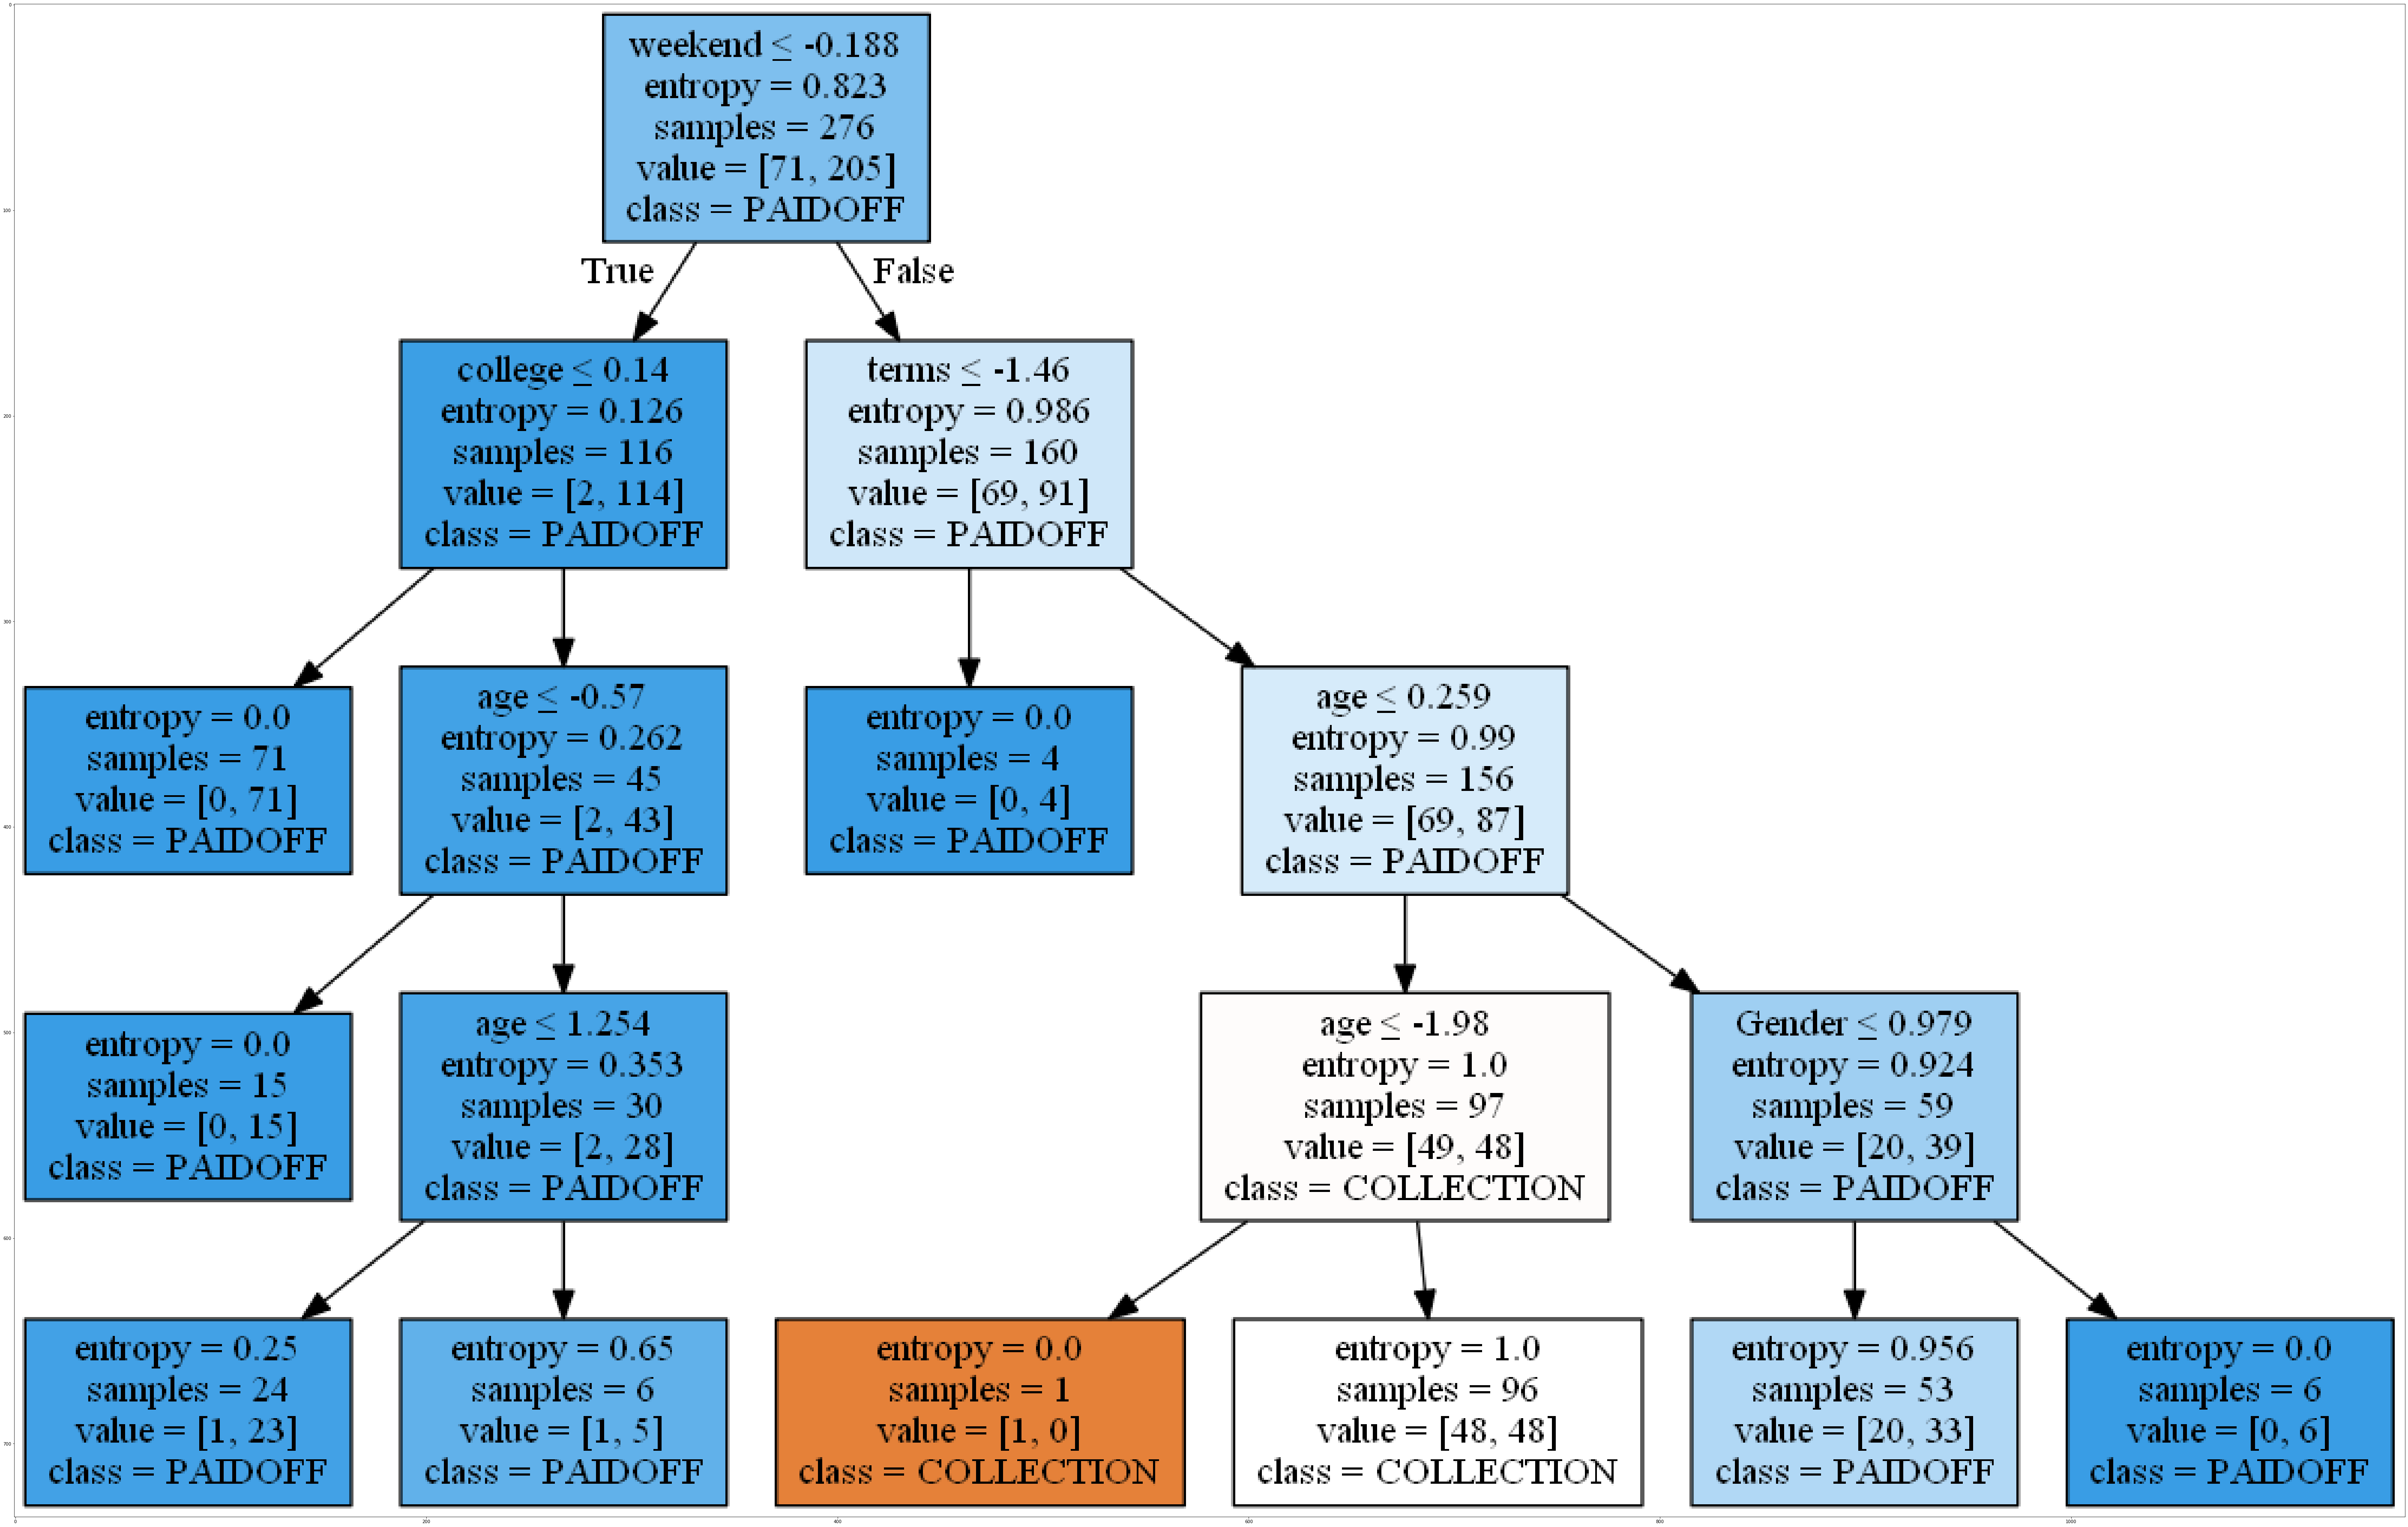

In [184]:


dot_data = StringIO()
filename = "loantree.png"
featureNames = Feature.columns[0:8]
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')



In [185]:
#get depth of tree

print(loanTree.get_depth())

4


Most leaves have only one or two samples. Not sufficient structure in data for decision tree to find, therefore poor performance.

# Support Vector Machine


In [186]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print(X_train[0:5])
print(y_train[0:5])
print(y_test[0:5])

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
[[ 0.51578458 -0.95911111  0.67333883 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.01006414 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458 -0.95911111 -0.98484789 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]]
['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [187]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

#from sklearn.metrics import classification_report, confusion_matrix
#import itertool

In [188]:


for kernel_function in ['linear', 'poly', 'rbf', 'sigmoid']:
    print("\nUsing: ", kernel_function)
    
    clf = svm.SVC(kernel=kernel_function)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    #print(yhat[0:5])
    
    #accuracy metrics: Higher is better
    print(f1_score(y_test, yhat, average='weighted'))
    print(jaccard_score(y_test, yhat, pos_label = 'COLLECTION'))
    
    


Using:  linear
0.6914285714285714
0.0

Using:  poly
0.7064793130366899
0.058823529411764705

Using:  rbf
0.7275882012724117
0.18181818181818182

Using:  sigmoid
0.6892857142857144
0.05263157894736842


rbf yields best results -> Rebuild model with rbf:

In [189]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

# Logistic Regression


In [190]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print(X_train[0:5])
print(y_train[0:5])
print(y_test[0:5])

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
[[ 0.51578458 -0.95911111  0.67333883 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.01006414 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458 -0.95911111 -0.98484789 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]]
['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR_model.predict(X_test)
yhat

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [206]:

jaccard_score(y_test, yhat,pos_label='PAIDOFF')


0.6764705882352942

# Model Evaluation using Test set


In [193]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [194]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [195]:
#test_df = pd.read_csv('loan_test.csv')
test_df = pd.read_csv(r'C:\Users\philipp\Documents\Coursera\Coursera IBM Data Science\Machine Learning with Python\Week 6 Assignment\loan_test.csv')
print(np.shape(test_df))
test_df.head()

(54, 10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [196]:
#Preprocess test data
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [197]:
#generate feature matrix
#test_df.groupby(['education'])['loan_status'].value_counts()
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)

print(test_Feature.head())

eval_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)

print(eval_X[0:5])

eval_y = test_df['loan_status'].values
print(eval_y)

   Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   50       1        0         1                     0   
1        300      7   35       0        1         0                     0   
2       1000     30   43       1        1         0                     1   
3       1000     30   26       0        1         0                     0   
4        800     15   29       0        1         1                     0   

   college  
0        0  
1        0  
2        0  
3        1  
4        0  
[[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76

In [198]:
#generate emplty report df
df_report = pd.DataFrame(columns=['Jaccard', 'F1-score', 'LogLoss'], index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'])
print(df_report)

                   Jaccard F1-score LogLoss
KNN                    NaN      NaN     NaN
Decision Tree          NaN      NaN     NaN
SVM                    NaN      NaN     NaN
LogisticRegression     NaN      NaN     NaN


In [199]:
#evaluate KNN

#train model with all training data
neigh = KNeighborsClassifier(n_neighbors = k_opt).fit(X,y)

#evaluate model
eval_yhat = neigh.predict(eval_X)
# print(eval_yhat)
print("Eval set Accuracy: ", metrics.accuracy_score(eval_y, eval_yhat))
jaccard_KNN = jaccard_score(eval_y, eval_yhat, pos_label = 'PAIDOFF')
f1_KNN = f1_score(eval_y, eval_yhat, average='weighted')

print("KNN Jaccard: ", jaccard_KNN)
print("KNN f1: ", f1_KNN)

df_report['Jaccard']['KNN'] = round(jaccard_KNN, 3)
df_report['F1-score']['KNN'] = round(f1_KNN, 3)                                    
print(df_report)

Eval set Accuracy:  0.7222222222222222
KNN Jaccard:  0.7
KNN f1:  0.7001989201477693
                   Jaccard F1-score LogLoss
KNN                    0.7      0.7     NaN
Decision Tree          NaN      NaN     NaN
SVM                    NaN      NaN     NaN
LogisticRegression     NaN      NaN     NaN


In [200]:
#evaluate Decision Tree

#train model with all training data
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree.fit(X,y)

#evaluate model
eval_predTree = loanTree.predict(eval_X)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(eval_y, eval_predTree))
#print(eval_predTree)

jaccard_DecTree = jaccard_score(eval_y, eval_predTree, pos_label = 'PAIDOFF')
f1_DecTree = f1_score(eval_y, eval_predTree, average='weighted')

df_report['Jaccard']['Decision Tree'] = round(jaccard_DecTree, 3)
df_report['F1-score']['Decision Tree'] = round(f1_DecTree, 3)                                    
print(df_report)



DecisionTrees's Accuracy:  0.7777777777777778
                   Jaccard F1-score LogLoss
KNN                    0.7      0.7     NaN
Decision Tree        0.765    0.728     NaN
SVM                    NaN      NaN     NaN
LogisticRegression     NaN      NaN     NaN


In [201]:
#evaluate SVM

#train model with all training data
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

#evaluate model
eval_yhat_svm = clf.predict(eval_X)

jaccard_SVM = jaccard_score(eval_y, eval_yhat_svm, pos_label = 'PAIDOFF')
f1_SVM = f1_score(eval_y, eval_yhat_svm, average='weighted')

df_report['Jaccard']['SVM'] = round(jaccard_SVM, 3)
df_report['F1-score']['SVM'] = round(f1_SVM, 3)                                    
print(df_report)

                   Jaccard F1-score LogLoss
KNN                    0.7      0.7     NaN
Decision Tree        0.765    0.728     NaN
SVM                  0.722    0.621     NaN
LogisticRegression     NaN      NaN     NaN


In [207]:
#evaluate LogisticRegression     
from sklearn.metrics import log_loss

LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

#evaluate model
eval_yhat_LR = LR_model.predict(eval_X)
eval_yhat_prob = LR_model.predict_proba(eval_X)
eval_yhat_LR

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [208]:
jaccard_LR = jaccard_score(eval_y, eval_yhat_LR, pos_label = 'PAIDOFF')
f1_LR = f1_score(eval_y, eval_yhat_LR, average='weighted')
#jaccard_LR = jaccard_similarity_score(eval_y, eval_yhat_LR)


df_report['Jaccard']['LogisticRegression'] = round(jaccard_LR, 4)
df_report['F1-score']['LogisticRegression'] = round(f1_LR, 3)
df_report['LogLoss']['LogisticRegression'] = round(log_loss(eval_y, eval_yhat_prob), 3)

print(df_report)

                   Jaccard F1-score LogLoss
KNN                    0.7      0.7     NaN
Decision Tree        0.765    0.728     NaN
SVM                  0.722    0.621     NaN
LogisticRegression  0.7358     0.66   0.567


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


In [210]:
print(df_report)

                   Jaccard F1-score LogLoss
KNN                    0.7      0.7     NaN
Decision Tree        0.765    0.728     NaN
SVM                  0.722    0.621     NaN
LogisticRegression  0.7358     0.66   0.567


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
